
#**Welcome to the second practice of ML 😇**
##I am Mahan Veisi and I hope you enjoy reading this machine learning notebook.

#**Q1**

###A stroke, also known as a cerebrovascular accident or CVA, occurs when a part of the brain is deprived of its blood supply and the part of the body that is controlled by brain cells deprived of blood stops working. This loss of blood supply can be due to lack of blood flow or due to bleeding in the brain tissue. A stroke is a medical emergency because it can lead to death or permanent disability. There are possibilities to treat these types of strokes, but this treatment should be started in the first few hours after the appearance of stroke symptoms.


###The ***csv.strokes*** data set contains the information of people and their stroke history. In this case, do the following steps:

##**a)** Perform pre-processing operations according to the goal of the problem.

importing the data

In [ ]:
import pandas as pd
import requests
from io import StringIO

dataset_link = 'https://physionet.org/static/published-projects/gaitpdb/gait-in-parkinsons-disease-1.0.0.zip'

# Download the file
response = requests.get(dataset_link)
data = response.text

# Use pandas to read the data (assuming it's a CSV file, adjust as needed)
df = pd.read_csv(StringIO(data))

# Now, 'df' contains your dataset
print(df.head())


Mounted at /content/drive


In [ ]:
import pandas as pd

csv = 'dataset.csv'
data = pd.read_csv(csv)

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


The Id feature is not gonna help us in predication of a stroke so I drop it. Aslo I I divide the data into two sections, X and Y

In [ ]:
X = data.drop(['id', 'ever_married', 'stroke'], axis=1)

y = data['stroke']

Let's check our data's shape

In [ ]:
print('X.shape: ' + str(X.shape))
print('y.shape: ' + str(y.shape))

X.shape: (43400, 9)
y.shape: (43400,)


but we may have missing values in our data

In [ ]:
if data.isnull().values.any():
    print('The dataset has missing values.')
else:
    print('The dataset has no missing values.')

The dataset has missing values.


In [ ]:
missing_values_per_feature = data.isnull().sum()

if missing_values_per_feature.any():
    print('Features with missing values:')
    print(missing_values_per_feature[missing_values_per_feature > 0])
else:
    print('No missing values in any feature.')

Features with missing values:
bmi                1462
smoking_status    13292
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


numericals = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']
numeric_imputer = SimpleImputer(strategy='mean')
X[numericals] = numeric_imputer.fit_transform(X[numericals])
scaler = StandardScaler()
X[numericals] = scaler.fit_transform(X[numericals])

categoricals = ['gender', 'work_type', 'Residence_type', 'smoking_status']
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categoricals] = categorical_imputer.fit_transform(X[categoricals])
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = encoder.fit_transform(X[categoricals])

X = X.drop(categoricals, axis=1)
X = pd.concat([X, pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categoricals))], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-1.741517,-0.321296,-0.223342,-0.217176,-1.388469,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.700823,3.112398,-0.223342,-0.383258,1.387150,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-1.519486,-0.321296,-0.223342,0.148621,-1.440839,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.233697,-0.321296,-0.223342,-0.822123,0.955096,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-1.253049,-0.321296,-0.223342,1.317458,-1.244451,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,-1.430674,-0.321296,-0.223342,-1.063359,-1.074248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
43396,0.612011,-0.321296,-0.223342,2.531294,3.508142,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43397,1.766571,3.112398,-0.223342,-0.290939,0.038618,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43398,-0.098488,-0.321296,-0.223342,-0.123465,0.601597,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = SVC(kernel='linear', class_weight='balanced', random_state=42)


In [ ]:
model.fit(X_train, y_train)


SVC(class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)


Accuracy: 0.7302995391705069
Confusion Matrix:
 [[6211 2312]
 [  29  128]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84      8523
           1       0.05      0.82      0.10       157

    accuracy                           0.73      8680
   macro avg       0.52      0.77      0.47      8680
weighted avg       0.98      0.73      0.83      8680



very strange!

if you look at the report, our f1-score for ones is only 0.1 and it is really bad for detecting strokes!

Let's look at our data again

In [ ]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-1.741517,-0.321296,-0.223342,-0.217176,-1.388469,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.700823,3.112398,-0.223342,-0.383258,1.387150,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-1.519486,-0.321296,-0.223342,0.148621,-1.440839,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.233697,-0.321296,-0.223342,-0.822123,0.955096,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-1.253049,-0.321296,-0.223342,1.317458,-1.244451,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,-1.430674,-0.321296,-0.223342,-1.063359,-1.074248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
43396,0.612011,-0.321296,-0.223342,2.531294,3.508142,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43397,1.766571,3.112398,-0.223342,-0.290939,0.038618,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43398,-0.098488,-0.321296,-0.223342,-0.123465,0.601597,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


So after all these efforts, our model can not predicate well. Actually, our data aren't very nice either! In addition, the zero data algorithm has a great deal of diversity.

We start again and this time we only use 2 * len(**one labeled data**) of the zero labeled dataset. This way, we can have a better dataset to feed to out model
The rest is like the previous tasks we've done

In [ ]:
majority_zero = data[data['stroke'] == 0]
minority_one = data[data['stroke'] == 1]


In [ ]:
print("majority_zero.shape: " + str(majority_zero.shape))
print("minority_one.shape: " + str(minority_one.shape))

majority_zero.shape: (42617, 12)
minority_one.shape: (783, 12)


Let's start the process of sampling!

In [ ]:
undersampled_majority = majority_zero.sample(n=len(minority_one)*2, random_state=42)
balanced_data = pd.concat([undersampled_majority, minority_one])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

X = balanced_data.drop(['id', 'ever_married', 'stroke'], axis=1)
y = balanced_data['stroke']

numericals = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']
numeric_imputer = SimpleImputer(strategy='mean')
X[numericals] = numeric_imputer.fit_transform(X[numericals])
scaler = StandardScaler()
X[numericals] = scaler.fit_transform(X[numericals])

categoricals = ['gender', 'work_type', 'Residence_type', 'smoking_status']
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categoricals] = categorical_imputer.fit_transform(X[categoricals])
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = encoder.fit_transform(X[categoricals])

X = X.drop(categoricals, axis=1)
X = pd.concat([X, pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categoricals))], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = SVC(kernel='linear', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)


Accuracy: 0.7680851063829788
Confusion Matrix:
 [[227  86]
 [ 23 134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81       313
           1       0.61      0.85      0.71       157

    accuracy                           0.77       470
   macro avg       0.76      0.79      0.76       470
weighted avg       0.81      0.77      0.77       470



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Wow! 🙂

Much better. Now we have 0.85 of recall for ones.

We also can use poly SVCs. lowering the threshold for predicting ones is anouther way to test to see if we can have better results.

In [ ]:
model_poly = SVC(kernel='poly', degree=3, class_weight='balanced', random_state=42)
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)
classification_rep_poly = classification_report(y_test, y_pred_poly)
print('Classification Report (Polynomial Kernel):\n', classification_rep_poly)

Classification Report (Polynomial Kernel):
               precision    recall  f1-score   support

           0       0.85      0.74      0.80       313
           1       0.59      0.75      0.66       157

    accuracy                           0.74       470
   macro avg       0.72      0.74      0.73       470
weighted avg       0.77      0.74      0.75       470



So linear seems to be better in this case

results are acceptable but lets set a threshold so that we can predicate more risky strokes

In [ ]:
model_poly = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
model_poly.fit(X_train, y_train)
y_pred_poly_proba = model_poly.predict_proba(X_test)[:, 1]

custom_threshold = 0.3
y_pred_poly_thresholded = (y_pred_poly_proba > custom_threshold).astype(int)

classification_rep_poly_thresholded = classification_report(y_test, y_pred_poly_thresholded)
print('Classification Report (3rd-degree Poly SVC with Threshold Adjustment):\n', classification_rep_poly_thresholded)


Classification Report (3rd-degree Poly SVC with Threshold Adjustment):
               precision    recall  f1-score   support

           0       0.91      0.72      0.80       313
           1       0.60      0.85      0.71       157

    accuracy                           0.76       470
   macro avg       0.75      0.78      0.75       470
weighted avg       0.80      0.76      0.77       470



but which threshold is the best one? let's find it using our new function **custom_scorer**!

As we are detecting stroke, it is very important not to miss the ones, so I have set 90% of our attention to F1 score of ones in my custom function.

Best F1 Score: 0.7147368421052631
Best Recall Score: 0.839718361449706
Best Threshold: 0.3
Classification Report for Best Threshold:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       313
           1       0.60      0.85      0.71       157

    accuracy                           0.76       470
   macro avg       0.75      0.78      0.75       470
weighted avg       0.80      0.76      0.77       470



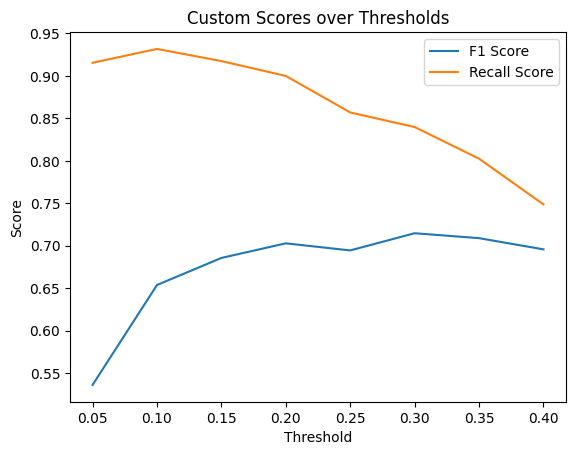

In [ ]:
from sklearn.metrics import f1_score, recall_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def custom_scorer(y_true, y_pred):
    f1_ones = f1_score(y_true, y_pred, pos_label=1)
    f1_zeros = f1_score(y_true, y_pred, pos_label=0)
    recall_ones = recall_score(y_true, y_pred, pos_label=1)
    recall_zeros = recall_score(y_true, y_pred, pos_label=0)

    return 0.9 * f1_ones + 0.1 * f1_zeros, 0.9 * recall_ones + 0.1 * recall_zeros

model_poly = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
model_poly.fit(X_train, y_train)

custom_thresholds = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.4]
best_threshold = custom_thresholds[0]
best_score_f1, best_score_recall = 0, 0

history_scores_f1 = []
history_scores_recall = []

for threshold in custom_thresholds:
    y_pred_poly_proba = model_poly.predict_proba(X_test)[:, 1]
    pred = (y_pred_poly_proba > threshold).astype(int)
    score_f1, score_recall = custom_scorer(y_test, pred)
    history_scores_f1.append(score_f1)
    history_scores_recall.append(score_recall)

    if score_f1 > best_score_f1:
        best_threshold = threshold
        best_score_f1 = score_f1
        best_score_recall = score_recall
        best_pred = pred

print(f"Best F1 Score: {best_score_f1}")
print(f"Best Recall Score: {best_score_recall}")
print(f"Best Threshold: {best_threshold}")
print("Classification Report for Best Threshold:")
print(classification_report(y_test, best_pred))

plt.plot(custom_thresholds, history_scores_f1, label='F1 Score')
plt.plot(custom_thresholds, history_scores_recall, label='Recall Score')
plt.title('Custom Scores over Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()


##Q2

In [ ]:
ls

In [ ]:
import pandas as pd
csv = 'insurance.csv'
data = pd.read_csv(csv)
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
print("shape: " + str(data.shape))

shape: (1338, 7)


In [ ]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


that's great! We don't need to worry about having missing values in each row.

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])
numeric_features = ['age', 'bmi', 'children', 'charges']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [ ]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,-0.953689,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,-0.728675,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,0.719843,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,-0.776802,0,1,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('charges', axis=1)
y = data['charges']

print("X.shape: ", str(X.shape))
print("y.shape: ", str(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes after Train-Test Split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X.shape:  (1338, 11)
y.shape:  (1338,)
Shapes after Train-Test Split:
X_train shape: (1070, 11)
X_test shape: (268, 11)
y_train shape: (1070,)
y_test shape: (268,)


so let's create the linear regression model from scratch.

some important notes:



*   to prevent unbias problems after the initializing (for example when all of out inputs are zeros and we want to predict the result), I use np.ones() to bias my input. so finally it concatinates the ones to my features! isn't it beautiful? 🙂
*   I use Mean Squared Error (MSE) for the loss function
*   learning rate is set to 0.01 but we should test what value can be better (definitely Variable learning rates are better but it is beyond the scope of this HW)
*   as we have used bias for trainig, we should use it for our predictions too!
*   I also liked to add early stopping so that if the loss doesn't decrease or decreases very slowly, you can stop the training process early 🤔

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, early_stopping_epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.early_stopping_epochs = early_stopping_epochs
        self.coefficients = None
        self.loss_history = []

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    def fit(self, X, y):
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        self.coefficients = np.zeros(X_with_bias.shape[1])

        prev_loss = float('inf')
        consecutive_epochs_no_improvement = 0

        for epoch in range(self.epochs):
            predictions = np.dot(X_with_bias, self.coefficients)
            errors = predictions - y
            gradients = 2 * np.dot(errors, X_with_bias) / X_with_bias.shape[0]
            self.coefficients -= self.learning_rate * gradients
            current_loss = self.mean_squared_error(y, predictions)
            self.loss_history.append(current_loss)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {current_loss}')

            # early stopping
            if current_loss >= prev_loss:
                consecutive_epochs_no_improvement += 1
                if consecutive_epochs_no_improvement >= self.early_stopping_epochs:
                    print(f"Stopping early at epoch {epoch} due to lack of improvement.")
                    break
            else:
                consecutive_epochs_no_improvement = 0

            prev_loss = current_loss

    def predict(self, X):
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        predictions = np.dot(X_with_bias, self.coefficients)
        return predictions

    def plot_loss_history(self):
        plt.plot(range(1, len(self.loss_history) + 1), self.loss_history, marker='o', linestyle='-', color='b')
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error (MSE)')
        plt.show()


Epoch 0, Loss: 0.9849639866441595
Epoch 100, Loss: 0.8733798160034714
Epoch 200, Loss: 0.7857948961357777
Epoch 300, Loss: 0.7148595247283125
Epoch 400, Loss: 0.6560576316674628
Epoch 500, Loss: 0.6064582058879209
Epoch 600, Loss: 0.5640707978592613
Epoch 700, Loss: 0.5274900149346369
Epoch 800, Loss: 0.4956883608671556
Epoch 900, Loss: 0.46789031269180603
Epoch 1000, Loss: 0.4434933034387138
Epoch 1100, Loss: 0.42201688550724376
Epoch 1200, Loss: 0.4030693151150084
Epoch 1300, Loss: 0.3863251317482528
Epoch 1400, Loss: 0.3715097896409788
Epoch 1500, Loss: 0.3583888766096361
Epoch 1600, Loss: 0.3467603591808864
Epoch 1700, Loss: 0.3364488550706316
Epoch 1800, Loss: 0.3273012878935033
Epoch 1900, Loss: 0.31918350354560615
Epoch 2000, Loss: 0.31197757116179026
Epoch 2100, Loss: 0.3055795837407237
Epoch 2200, Loss: 0.29989783314848734
Epoch 2300, Loss: 0.29485127304480424
Epoch 2400, Loss: 0.29036820879672
Epoch 2500, Loss: 0.2863851704025488
Epoch 2600, Loss: 0.2828459358721356
Epoch 270

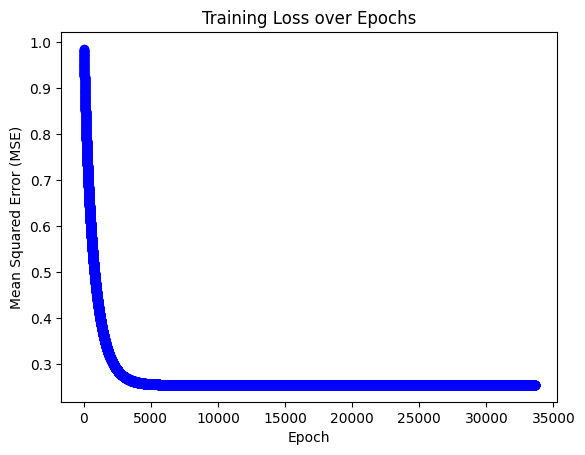

In [ ]:
linear_model = LinearRegression(learning_rate=0.001, epochs=100000, early_stopping_epochs=50)
linear_model.fit(X_train, y_train)
predictions_linear = linear_model.predict(X_test)
mse_linear = np.mean((y_test - predictions_linear)**2)
accuracy_linear = 1 - (mse_linear / np.var(y_test))

print(f'Linear Regression Model Accuracy: {accuracy_linear}')

linear_model.plot_loss_history()

IT IS SO COOL HA? 🔥

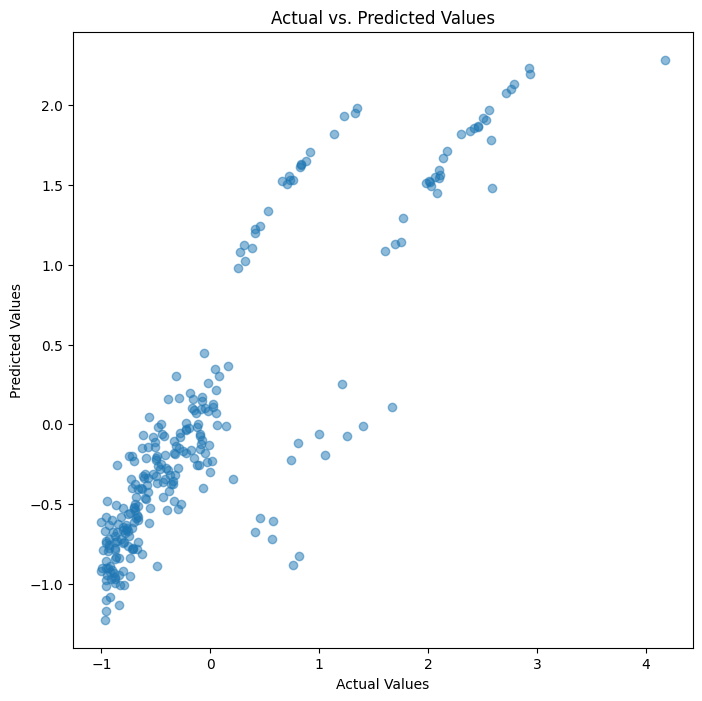

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions_linear, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

now let's use polynomial features to the input X.

so I create a second model with some functions in it to

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

class PolynomialRegression:
    def __init__(self, degree=1, learning_rate=0.01, epochs=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coefficients = None
        self.loss_history = None
        self.poly_features = PolynomialFeatures(degree=degree)

    def add_polynomial_features(self, X):
        return self.poly_features.fit_transform(X)

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    def fit(self, X, y):
        X_poly = self.add_polynomial_features(X)
        X_with_bias = np.c_[np.ones(X_poly.shape[0]), X_poly]
        self.coefficients = np.zeros(X_with_bias.shape[1])
        self.loss_history = []

        for epoch in range(self.epochs):
            predictions = np.dot(X_with_bias, self.coefficients)
            errors = predictions - y

            gradients = 2 * np.dot(errors, X_with_bias) / X_with_bias.shape[0]
            self.coefficients -= self.learning_rate * gradients

            current_loss = self.mean_squared_error(y, predictions)
            self.loss_history.append(current_loss)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {current_loss}')

    def predict(self, X):
        X_poly = self.add_polynomial_features(X)
        X_with_bias = np.c_[np.ones(X_poly.shape[0]), X_poly]
        return np.dot(X_with_bias, self.coefficients)

    def plot_loss_history(self):
        plt.plot(range(1, self.epochs + 1), self.loss_history, marker='o', linestyle='-', color='b')
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error (MSE)')
        plt.show()


Epoch 0, Loss: 0.9849639866441595
Epoch 100, Loss: 0.2130833077653355
Epoch 200, Loss: 0.16865293858848476
Epoch 300, Loss: 0.16063515042458867
Epoch 400, Loss: 0.1581818716902944
Epoch 500, Loss: 0.15720109799209833
Epoch 600, Loss: 0.15671513882203386
Epoch 700, Loss: 0.156431668396552
Epoch 800, Loss: 0.15624853637457775
Epoch 900, Loss: 0.1561233314137466
Epoch 1000, Loss: 0.15603506390863212
Epoch 1100, Loss: 0.15597174833631133
Epoch 1200, Loss: 0.1559258494820063
Epoch 1300, Loss: 0.15589234537034502
Epoch 1400, Loss: 0.15586777068193228
Epoch 1500, Loss: 0.15584968231680904
Epoch 1600, Loss: 0.1558363333950142
Epoch 1700, Loss: 0.15582646254385152
Epoch 1800, Loss: 0.1558191524479563
Epoch 1900, Loss: 0.15581373243584723
Epoch 2000, Loss: 0.1558097101677198
Epoch 2100, Loss: 0.1558067230858934
Epoch 2200, Loss: 0.1558045035577828
Epoch 2300, Loss: 0.15580285365175842
Epoch 2400, Loss: 0.15580162677114243
Epoch 2500, Loss: 0.15580071421703587
Epoch 2600, Loss: 0.1558000353199719

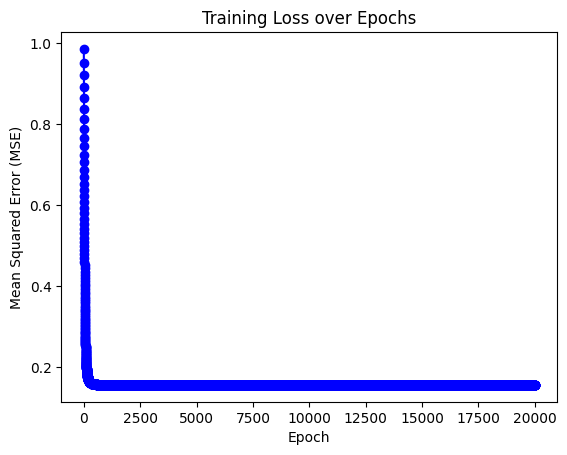

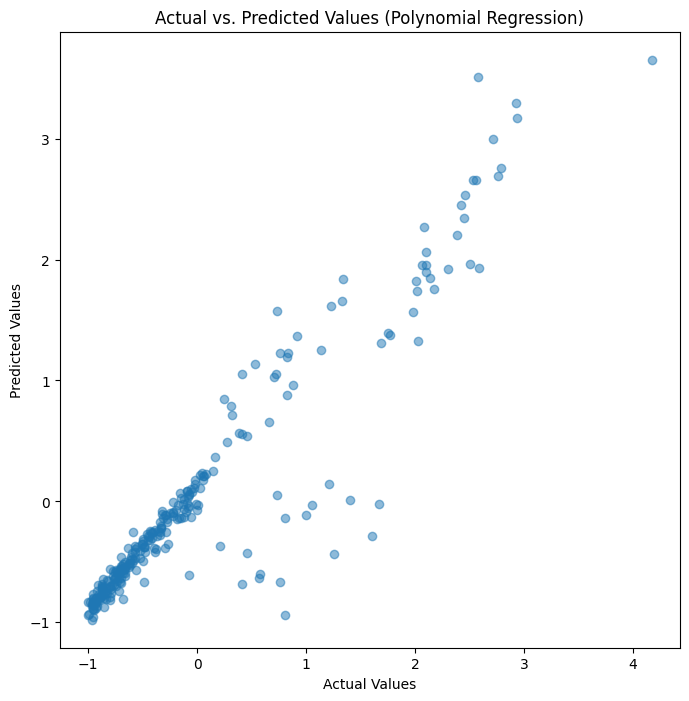

In [ ]:
poly_model = PolynomialRegression(degree=2, learning_rate=0.01, epochs=20000)
poly_model.fit(X_train, y_train)
predictions_poly = poly_model.predict(X_test)
mse_poly = np.mean((y_test - predictions_poly)**2)
accuracy_poly = 1 - (mse_poly / np.var(y_test))

print(f'Polynomial Regression Model Accuracy: {accuracy_poly}')

poly_model.plot_loss_history()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions_poly, alpha=0.5)
plt.title('Actual vs. Predicted Values (Polynomial Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

so the polynomial works better even in less epochs 🔥🔥🔥🔥